# Лабораторна робота №2

### Частина №1

Генеруємо 100000 нормально розподілених випадкових величин.

In [1]:
X <- rnorm(100000, mean = 3, sd = 2)

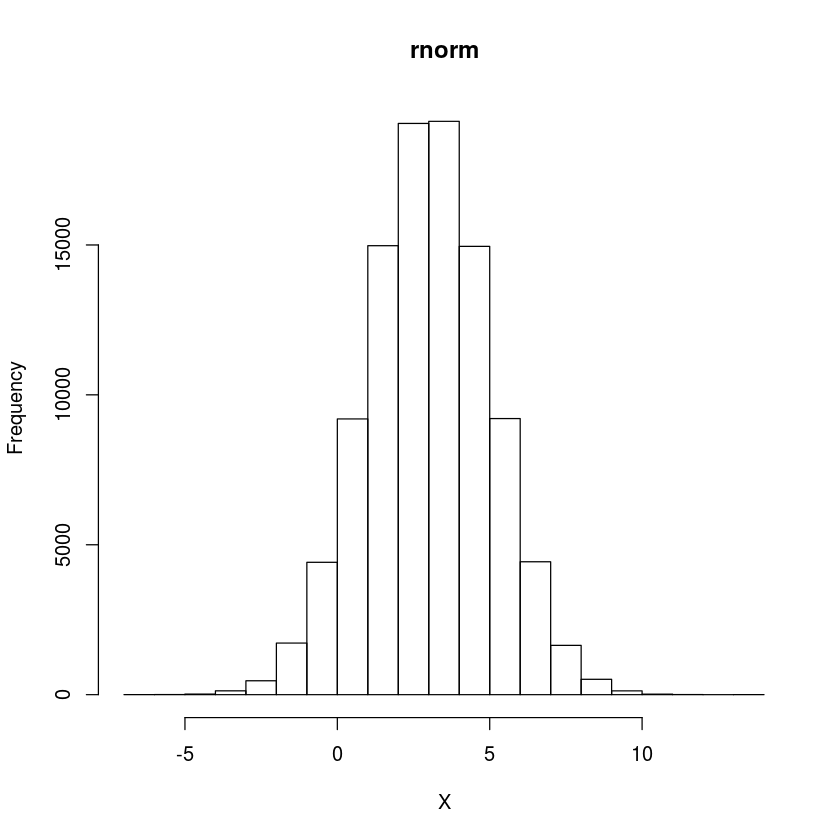

In [2]:
hist(X, main="rnorm")

Реалізація критерію хі-квадрат Пірсона перевірки розподілу на нормальність розподілу.

In [3]:
chi_square_normal_test <- function(dataset) {    
    mean <- mean(dataset)
    sd <- sd(dataset)
    
    norm_dataset <- (dataset - mean) / sd
    
    size_of_dataset = length(dataset)
    
    f = function(z) {(1 / sqrt(2 * pi)) * exp(-(z ^ 2) / 2)}
    laplas_funct = function(lower, upper) {integrate(f, lower, upper)$val}
    
    sturgess_formula = 1 + 3.322 * log10(size_of_dataset)
    amount_of_intervals = round(sturgess_formula) + 1
    
    max <- max(dataset)
    min <- min(dataset)
    
    step <- (max - min) / amount_of_intervals
    
    actual_frequency <- list()
    theoretical_frequency <- list()
    Chi_Square_actual <- 0
    
    for (i in 0:(amount_of_intervals - 1)) {
        lower_bound <- min + i * step  
        upper_bound <- min + (i + 1) * step
        
        actual <- 0  
        if (i == amount_of_intervals - 1)
            actual <- length(dataset[dataset >= lower_bound & dataset <= upper_bound])
        else
            actual <- length(dataset[dataset >= lower_bound & dataset < upper_bound])
        
        actual_frequency <- append(actual_frequency, actual)
        
        theoretical = size_of_dataset * laplas_funct((lower_bound - mean) / sd, (upper_bound - mean) / sd)
        
        theoretical_frequency <- append(theoretical_frequency, theoretical)
        
        Chi_Square_actual <- Chi_Square_actual + (((actual - theoretical) ^ 2) / theoretical)
    }
    
    Chi_Square_critical <- qchisq(p = 0.95, df = amount_of_intervals - 3)
    
    print(paste("Actual: ", Chi_Square_actual))
    print(paste("Critical: ", Chi_Square_critical))
    
    return(Chi_Square_actual < Chi_Square_critical)
}

### Частина №2

Функція __e1__ генерує випадкові величини згідно формули

$\epsilon_1 = \sqrt{-2\ln(\alpha_i)} \times sin(2\pi\alpha_2)$

Функція __e2__ генерує випадкові величини згідно формули

$\epsilon_2 = \sqrt{-2\ln(\alpha_i)} \times cos(2\pi\alpha_2)$

In [4]:
e1 = function(amount) {
    alpha_1 = runif(amount)
    alpha_2 = runif(amount)
    
    epsilon = sqrt(-2 * log(alpha_1)) * sin(2 * pi * alpha_2)
    return(epsilon)
}
e2 = function(amount) {
    alpha_1 = runif(amount)
    alpha_2 = runif(amount)
    
    epsilon = sqrt(-2 * log(alpha_1)) * cos(2 * pi * alpha_2)
    return(epsilon)
}

Функція __e__ генерує випадкові величини згідно формули

$\epsilon(t) = \sqrt{\frac{12}{n}} \sum_{i=1}^{n} (\alpha_j - 0.5)$, де $n = 3, 6, 12$

In [5]:
e = function(amount, n) {
    result = runif(amount) - 0.5
    
    for (i in 2:n) {
        result = result + (runif(amount) - 0.5)
    }
    result = sqrt(12/n) * result
}

In [6]:
check_is_normal = function(dataset, name) {
    print(paste("------", name, "------"))
    if (chi_square_normal_test(dataset)) {
        print("Dataset is normally distributed")
    } else {
        print("Dataset is NOT normally distributed")
    }
}

In [7]:
check_is_normal(X, "rnorm")

e_1 = e1(10000)
e_2 = e2(10000)
e__3 = e(10000, 3)
e__6 = e(10000, 6)
e__12 = e(10000, 12)

check_is_normal(e_1, "e1")
check_is_normal(e_2, "e2")

check_is_normal(e__3, paste("e (n = 3)"))
check_is_normal(e__6, paste("e (n = 6)"))
check_is_normal(e__12, paste("e (n = 12)"))

[1] "------ rnorm ------"
[1] "Actual:  11.4590935422943"
[1] "Critical:  26.2962276048642"
[1] "Dataset is normally distributed"
[1] "------ e1 ------"
[1] "Actual:  12.2344450999857"
[1] "Critical:  21.0260698174831"
[1] "Dataset is normally distributed"
[1] "------ e2 ------"
[1] "Actual:  11.0738691279808"
[1] "Critical:  21.0260698174831"
[1] "Dataset is normally distributed"
[1] "------ e (n = 3) ------"
[1] "Actual:  44.7728689288941"
[1] "Critical:  21.0260698174831"
[1] "Dataset is NOT normally distributed"
[1] "------ e (n = 6) ------"
[1] "Actual:  32.6722252193455"
[1] "Critical:  21.0260698174831"
[1] "Dataset is NOT normally distributed"
[1] "------ e (n = 12) ------"
[1] "Actual:  12.0880322526665"
[1] "Critical:  21.0260698174831"
[1] "Dataset is normally distributed"


Гістограма випадкових величин, згенерованих функціями __е1__ та __е2__.

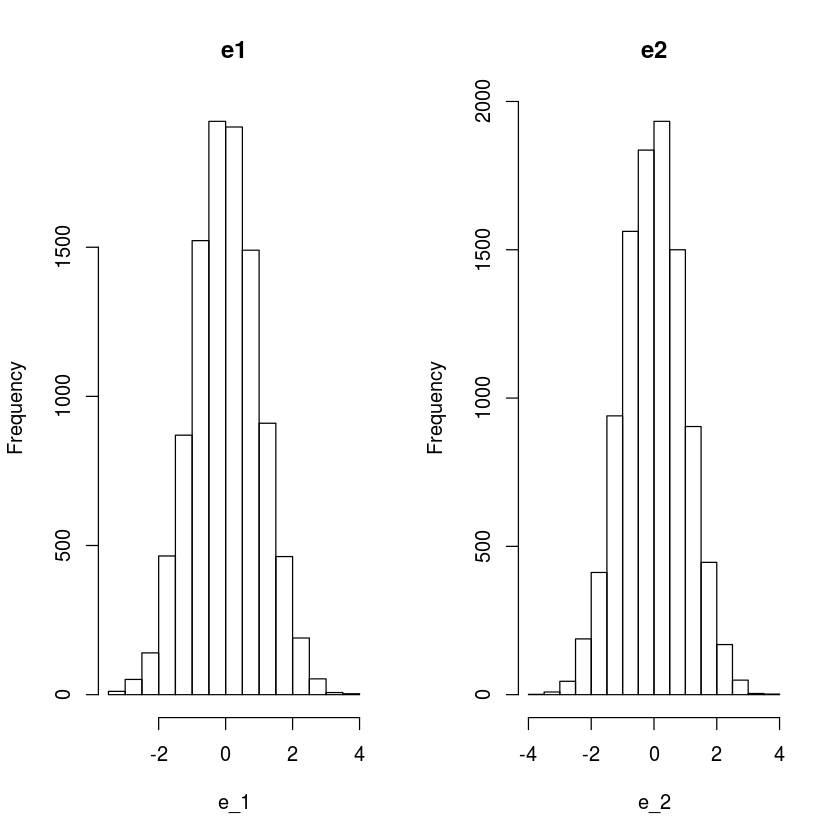

In [10]:
par(mfrow=c(1, 2))

hist(e_1, main="e1")
hist(e_2, main="e2")

Гістограма випадкових величин, згенерованих функцією __е__ за різних значень __n__.

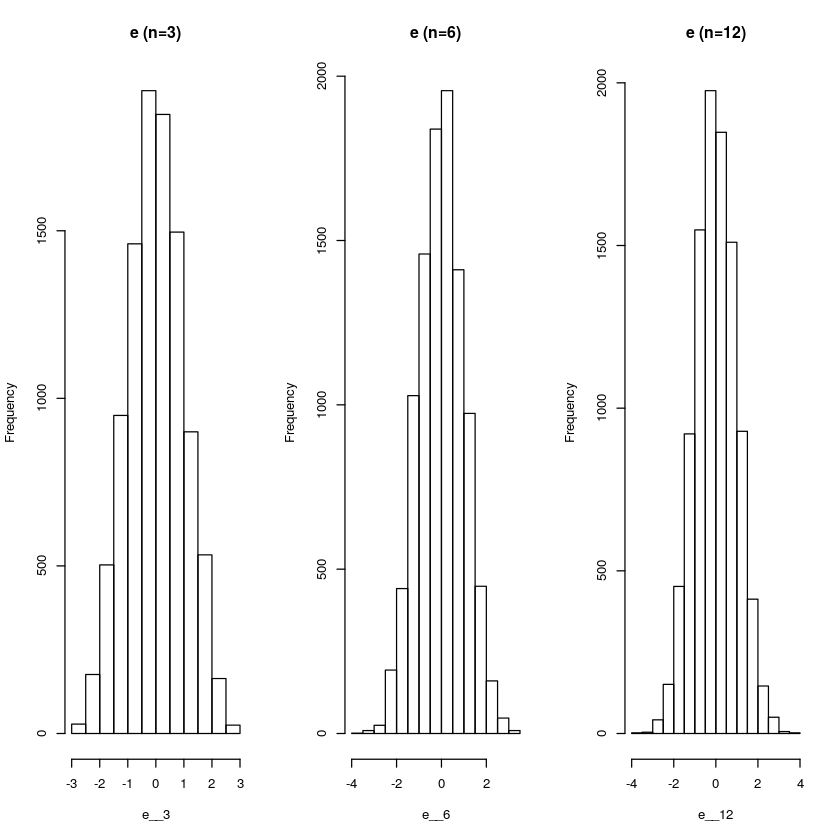

In [9]:
par(mfrow=c(1,3))

hist(e__3, main="e (n=3)")
hist(e__6, main="e (n=6)")
hist(e__12, main="e (n=12)")

### Частина №3

Функції __run_a__ та __run_b__ на основі генератора __runif__ рівномірно розподілених випадкових величин, генерують нормально розподілені випадкові величини згідно наступних формул.

Причому, $N = 1000 \times 21$.

А $\mu_i^1$ та $\mu_i^2$ - нормально розподілена випадкова величина з параметрами: $M\eta_i^1 = M\eta_i^2 = 0$, $D\eta_i^1 = D\eta_i^2 = \sigma_i^2 = \frac{1}{1+\pi i^2}$.

$\epsilon(t) = \sum_{i=1}^{N} (\cos(\lambda_i t)\eta_i^1 + \sin(\lambda_i t)\eta_i^2)$, де $\lambda_i = i\pi$

In [11]:
run_a <- function(t) {
    N <- 1000 * 21
    
    sigma = function(i) {sqrt(1 / (1 + pi * i * i))}
    lambda = function(i) {i * pi}
    
    result <- c()
    for (k in 1:t) {
        part_of_result <- 0
        for (i in 1:N) {
            nu <- rnorm(2, mean = 0, sd = sigma(i))
            part_of_result <- part_of_result + cos(lambda(i) * t) * nu[[1]] + sin(lambda(i) * t) * nu[[2]]
        }
        result <- append(result, part_of_result)
    }
    
    return(result)
}

$\epsilon(t) = \sum_{i=1}^{N} (\cos(\lambda_i t)\eta_i^1 + \sin(\lambda_i t)\eta_i^2)$, де $\lambda_i \in [i\pi,(i+1)\pi]$ - рівномірно розподілена випадкова величина.

In [16]:
run_b <- function(t) {
    N <- 1000 * 21
    
    sigma <- function(i) {sqrt(1 / (1 + pi * i * i))}
    
    result <- c()
    for (k in 1:t) {
        part_of_result <- 0
        for (i in 1:N) {
            nu <- rnorm(2, mean = 0, sd = sigma(i))
            lambda <- runif(1, pi * i, pi * (i + 1))
            part_of_result <- part_of_result + cos(lambda[[1]] * t) * nu[[1]] + sin(lambda[[1]] * t) * nu[[2]]
        }
        result <- append(result, part_of_result) 
    }
    
    return(result)
}

Побудова гістограм реалізацій випадкових величин та графіку середнього значення.

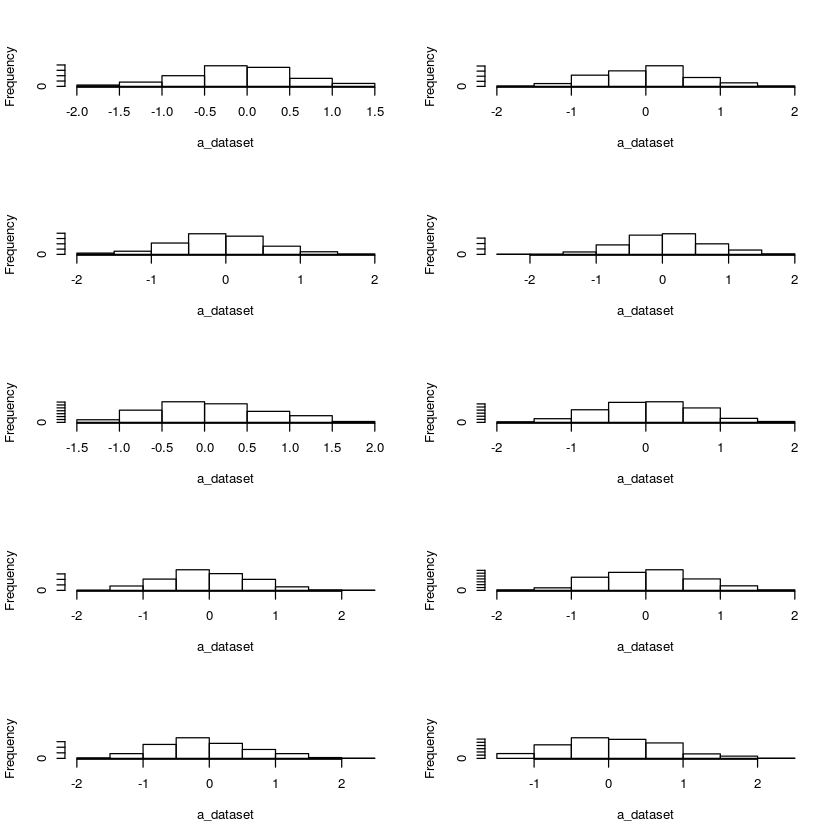

In [14]:
a_means <- c()

par(mfrow=c(5, 2))

for (i in 1:10) {
    a_dataset <- run_a(250)
    hist(a_dataset, main=NULL)
    
    a_means <- append(a_means, mean(a_dataset))
}

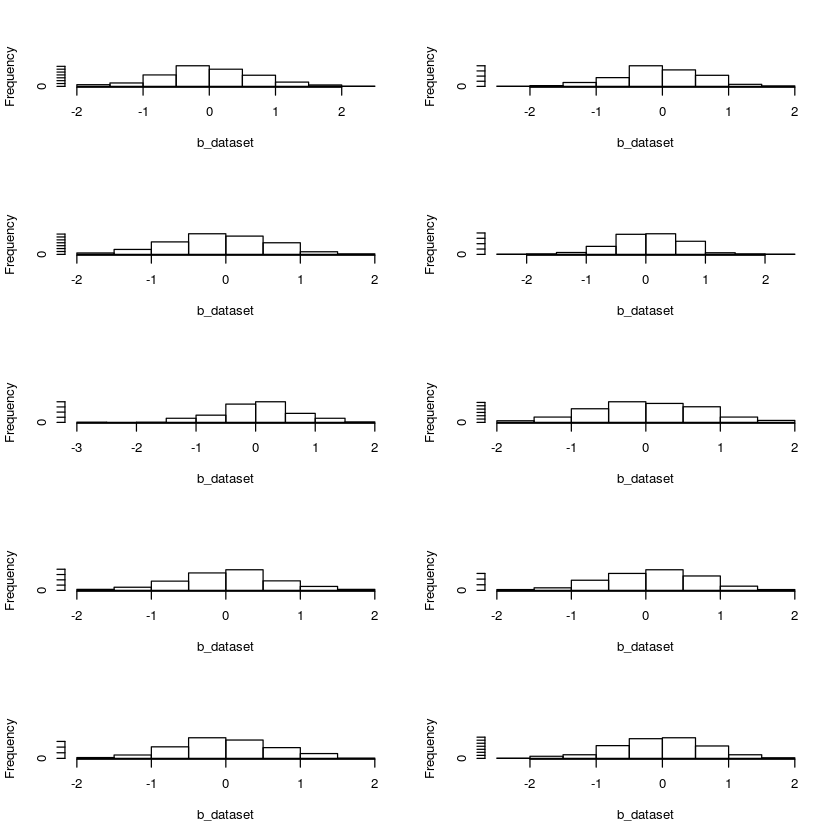

In [17]:
b_means <- c()

par(mfrow=c(5, 2))

for (i in 1:10) {
    b_dataset <- run_b(250)
    hist(b_dataset, main=NULL)
    
    b_means <- append(a_means, mean(a_dataset))
}

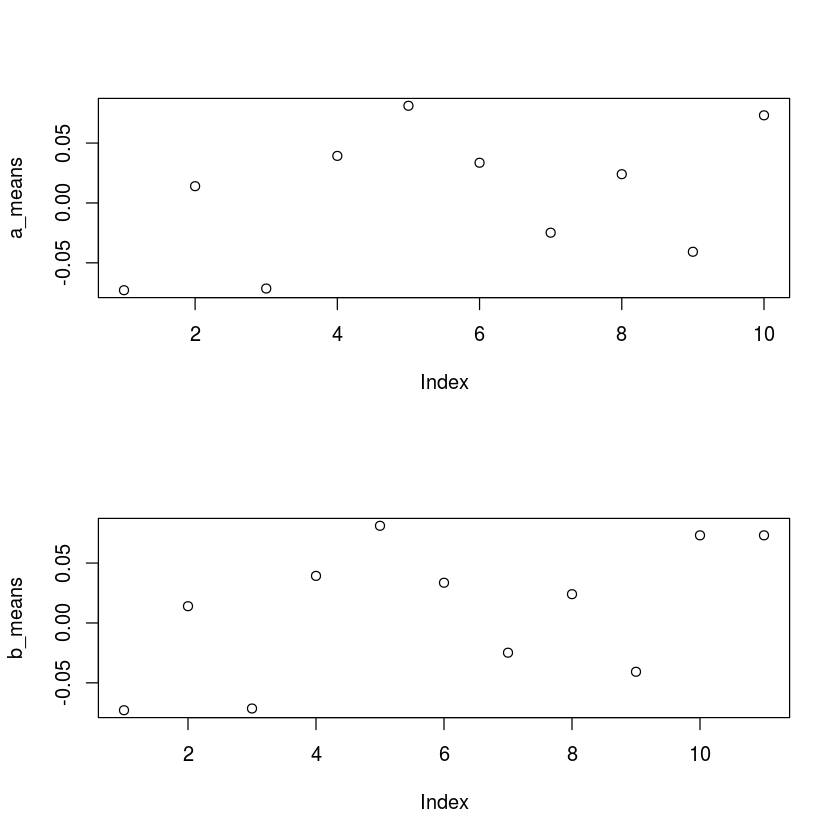

In [18]:
par(mfrow=c(2, 1))
plot(a_means)
plot(b_means)